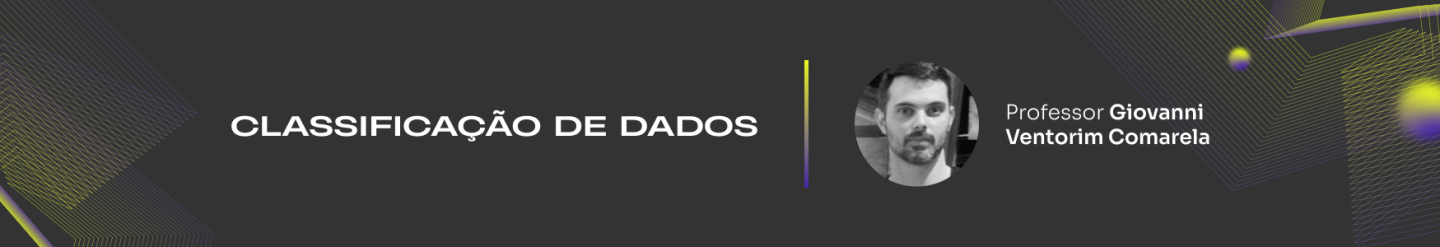

# Curva ROC e AUC

Na aula passada vimos várias formar diferentes de se avaliar um classificador?
- Matriz de confusão;
- Acurácia;
- Precisão;
- Revocação; e
- *F1-score*.

Hoje, veremos duas novas técnicas de avaliação. A curva ROC (*Receiver operating characteristic*) e AUC (*Area Under the Curve*).

## Curva ROC

A Curva ROC (*Receiver Operating Characteristic*) é uma metodologia útil para analisar e avaliar classificadores em alguns contextos específicos.

Assim como na aula passada, vamos supor que:

1. Estamos com um classificador $C$, já treinado para um problema de **classificação binária**.

2. Um conjunto de dados rotulados, $T = \{(\mathbf{x}_i, y_i)\}_{i=1}^m$, está disponível para avaliar o classificador.  $T$ é chamado de conjunto de **teste**.

3. Para cada $\mathbf{x}$, $C$ também consegue calcular um *score* que represente a chance de $\mathbf{x}$ ser da classe positiva.

Em geral, classificadores com essas propriedades funcionam da seguinte maneira. Um limiar $\rho$ é estabelecido e:
1. Itens com *score* maior que $\rho$ são classificados como sendo da classe positiva; e
2. Itens com *score* menor ou igual a $\rho$ são classificados como sendo da classe negativa.

### Exemplo I - KNN

O KNN satisfaz os requisitos acima. Quando queremos classificar um $\mathbf{x}$ com o KNN, o classificador:
1. Calcula a fração de elementos da classe positiva entre os $k$ vizinhos mais próximos de $\mathbf{x}$
2. Se a fração acima (*score*) for maior que $\rho = 0.5$, então a classe predita é positiva. Caso contrário, a classe predita é negativa.

E se mudássemos o valor do limiar utilizado? Vejamos um exemplo com um conjunto de dados sintético.

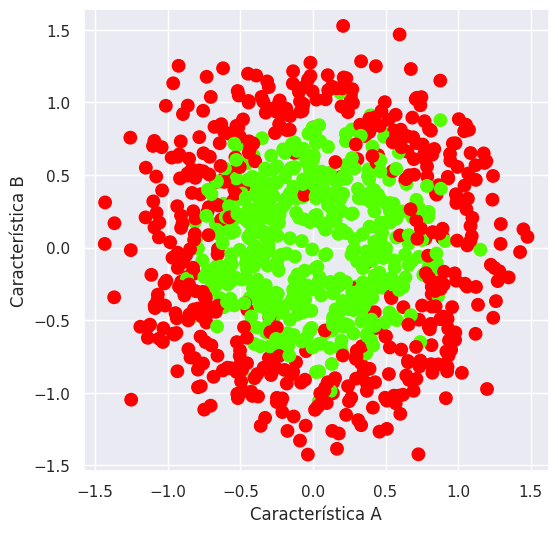

In [ ]:
#@title

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets

sns.set()

X, y = datasets.make_circles(n_samples = 1000, noise=.2, factor=.5, random_state=1)

plt.figure(figsize = (6,6))
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y, s = 80)
#plt.axis('off')
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');

Vamos dividir o conjunto em questão em subconjuntos de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

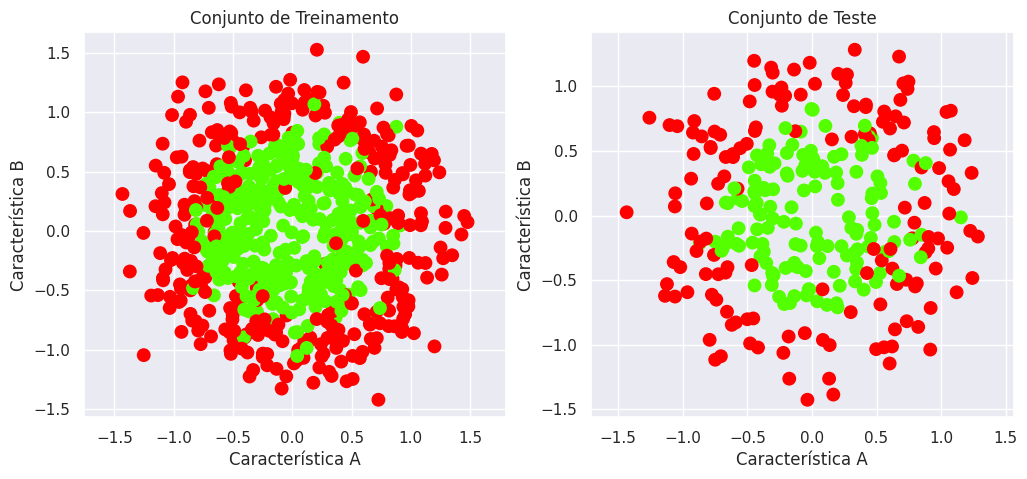

In [ ]:
#@title Conjuntos de Treinamento e Teste

fig_size = (12, 5)

plt.figure(figsize = fig_size)
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 80)
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');
plt.title('Conjunto de Treinamento')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 80)
plt.title('Conjunto de Teste')
plt.axis('equal')
plt.xlabel('Característica A')
plt.ylabel('Característica B');

A título de exemplo, a seguir, treinamos um KNN com $k = 20$ no conjunto de treinamento.

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# transformação por reescala
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# treinamento com k = 20
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train_scaled, y_train);

Para cada elemento $\mathbf{x}$ do conjunto de teste, ao invés de realizar a predição da classe do elemento, vamos calcular a fração de elementos pertencente a cada classe dentre os $k = 20$ mais próximos de $\mathbf{x}$ (no conjunto de treinamento).

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_proba = model.predict_proba(X_test_scaled)

In [ ]:
y_proba

array([[0.95, 0.05],
       [0.95, 0.05],
       [0.1 , 0.9 ],
       [0.4 , 0.6 ],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.95, 0.05],
       [0.3 , 0.7 ],
       [0.8 , 0.2 ],
       [0.25, 0.75],
       [0.05, 0.95],
       [0.05, 0.95],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.75, 0.25],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [0.15, 0.85],
       [0.3 , 0.7 ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.4 , 0.6 ],
       [0.  , 1.  ],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.15, 0.85],
       [0.8 , 0.2 ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.05, 0.95],
       [0.15, 0.85],
       [0.7 , 0.3 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.4 , 0.6 ],
       [0.8 , 0.2 ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.25,

Assim, se usarmos o limiar de $\rho = 0.5$, para a segunda coluna da matriz acima, teremos o KNN padrão.

Vejamos isso no código abaixo.



In [ ]:
# Predizendo as classes dos elementos do conjunto de teste usando o limiar 0.5
rho = 0.5
y_pred_rho = [1 if x > rho else 0 for x in y_proba[:, 1]]

# Predizendo as classes dos elementos do conjunto de teste usando a função padrão da scikit-learn
y_pred = model.predict(X_test_scaled)

# verificando se os dois vetores são iguais em todas as posições.
(y_pred_rho == y_pred).all()

True

Se considerarmos outros valores para $\rho$, o desempenho do classificador muda?

Vejamos o que acontece com o *F1-Score*.

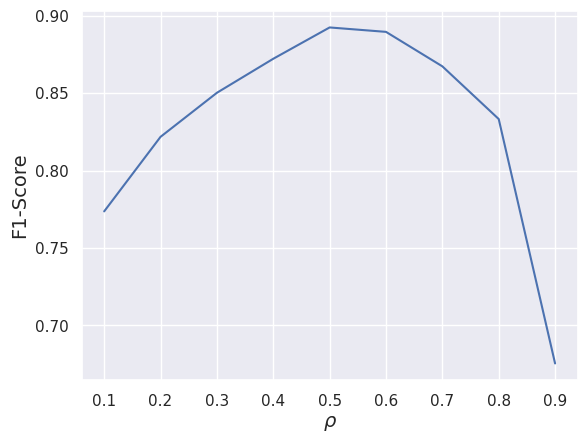

In [ ]:
from sklearn.metrics import f1_score

def compute_f1_score(rho):
  y_pred_rho = [1 if x > rho else 0 for x in y_proba[:, 1]]
  return f1_score(y_test, y_pred_rho)

rho = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
f1 = [compute_f1_score(x) for x in rho]

plt.plot(rho, f1)
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'F1-Score', fontsize=14);

### Curva ROC - Definição

Como motivado no exemplo acima, a curva ROC tem o objetivo de entender o comportamento de um classificador quando o limiar de classificação, $\rho$, é variado.

No entanto, isso não é feito avaliando-se o *F1-Score* em função de $\rho$.

Ao invés disso, para cada valor de $\rho$, os rótulos preditos são obtidos e as seguintes métricas de desempenho do classificador são calculadas:
1. *False Positive Rate* = $\frac{FP}{FP+TN}$; e
2. *True Positive Rate* = $\frac{TP}{TP+FN}$

Após isso, a Curva ROC é obtida ao se fazer o gráfico dos valores de TPR (*True Positive Rate*) e FPR (*False Positive Rate*) computados para diferentes valores de $\rho$.

No código abaixo, apresenta-se a Curva ROC para o Exemplo do KNN apresentando anteriormente, fazendo uso da biblioteca [``scikit-learn``](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).




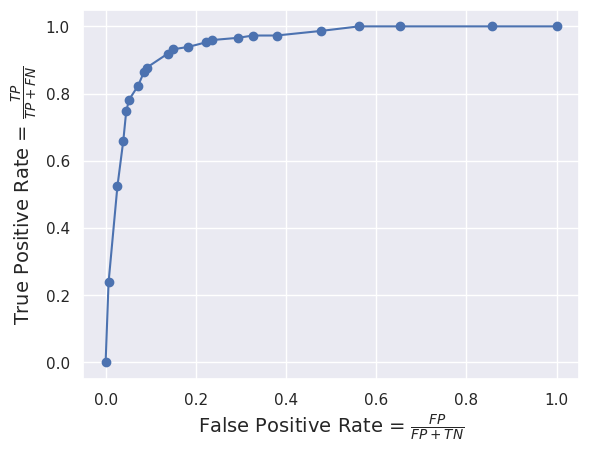

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, rhos = roc_curve(y_test, y_proba[:, 1])

plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.xlabel(r'False Positive Rate = $\frac{FP}{FP+TN}$', fontsize=14)
plt.ylabel(r'True Positive Rate = $\frac{TP}{TP + FN}$', fontsize=14);

Na figura acima, cada "ponto" no gráfico é referente a um valor de $\rho$.

### Curva ROC - Interpretação

- A Curva ROC é sempre não decrescente.

- Um classificador perfeito ocorre quando TPR = 1 e FPR = 0, ou seja, quando a Curva ROC passa pelo canto superior esquerdo do gráfico.

- Assim, um bom classificador possui uma Curva ROC que "passa perto" do ponto (0, 1).

A Figura abaixo (Fonte: [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)) ilustra essa intuição.

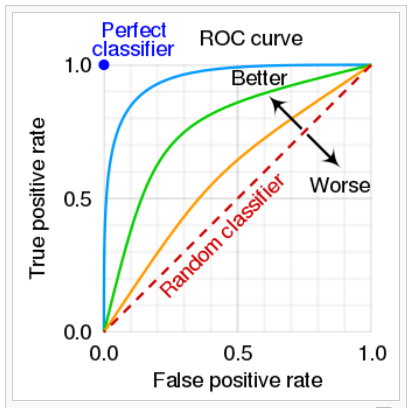

## AUC

A métrica AUC (*Area Under the Curve*) mede a área sob a Curva ROC.

Veja que, como um bom classificador possui curva ROC próxima ao ponto (0, 1), tem-se que, então, a área sob a curva ROC (AUC) será próxima de 1. À medida que esse valor decresce, há uma degradação do desempenho do classificador.

O código abaixo ilustra como a área sob a Curva ROC pode ser calculada utilizando a biblioteca [``scikit-learn``](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html).

Observe que a entrada para o método ``auc`` são os valores de FPR e TPR computados previamente.

In [ ]:
from sklearn.metrics import auc

print('AUC:', auc(fpr, tpr))

AUC: 0.9488684362633942


##Curva ROC e AUC em problemas multiclasse

As definições apresentadas para Curva ROC e AUC contemplam apenas casos de classificação binária.

É possível generalizar esses conceitos para problemas multiclasse. Aos interessados, recomenda-se a leitura do material disponível na documentação da biblioteca [``scikit-learn``](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

## Referências

Fontes da aula de hoje:
1. Capítulos 22 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

2. Várias figuras e definições extraídas de https://en.wikipedia.org/wiki/Precision_and_recall, https://en.wikipedia.org/wiki/Confusion_matrix e https://en.wikipedia.org/wiki/Receiver_operating_characteristic

3. Excelente visualizações https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

4. História. De onde vem o nome? https://en.wikipedia.org/wiki/Receiver_operating_characteristic#History_2